In [1]:
import os
import sys
import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import cv2

In [2]:
class ImageHeader:
    def __init__(self, img, df):
        self.image_size = (img.shape[0], img.shape[1])

In [3]:
def load_image_data(folder_id: int, image_id: int):
    file_name = './data/' + str(folder_id) + '/SimpleTest/' + str(image_id)
    
    if not os.path.isfile(file_name + '.png'):
        print("Image not exits")
        return None
    
    if not os.path.isfile(file_name + '.csv'):
        print("Data not exits")
        return None
    
    img = cv2.imread(file_name + '.png', cv2.IMREAD_GRAYSCALE)
    
    df = pd.read_csv(file_name + '.csv')
    
    return (img, df, ImageHeader(img, df))

In [4]:
show_counter = 0
    
def save_image(img, imageHeader=None, resize=True):
    global show_counter
    show_counter += 1
    number_as_str = str(show_counter)
    while len(number_as_str) < 3:
        number_as_str = '0' + number_as_str
    file_name = 'show_' + number_as_str + '.png'
    
    if imageHeader != None:
        if resize:
            img = img.copy()
            img.shape = imageHeader.image_size
    
    if os.path.exists(file_name):
        os.remove(file_name)
    
    return cv2.imwrite(file_name, img)

In [5]:
(img, df, imageHeader) = load_image_data(7554, 10)

img.shape

(925, 1381)

In [6]:
df

,X,Y,Pressure,TiltX,TiltY,Time
0,946.388266543481,798.408130,0.186999,-4447.0,1009.0,00:03.4787405
1,946.862224275321,796.512299,0.190906,-4447.0,1009.0,00:03.4943781
2,946.388266543481,794.774454,0.190417,-4199.0,927.0,00:03.5099814
3,945.598336990415,792.404666,0.223133,-4199.0,927.0,00:03.5256250
4,944.439773645918,789.613581,0.266835,-4199.0,927.0,00:03.5412356
...,...,...,...,...,...,...
1226,1050.02702390576,383.695115,0.555657,-535.0,1786.0,00:36.7040728
1227,1049.71105208454,383.589791,0.532219,-535.0,1786.0,00:36.7197060
1228,1048.65781268045,383.853101,0.286366,-535.0,1786.0,00:36.7197060
1229,Time Elapsed till drawing started: 00:03.4787405,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns = map(lambda x: x.replace(" ", ""), df.columns.tolist())

In [8]:
last_message1 = df.iloc[-2]['X']
last_message2 = df.iloc[-1]['X']

df = df.iloc[:-2].copy()

print(last_message1)
print(last_message2)

Time Elapsed till drawing started: 00:03.4787405
Time Elapsed till drawing submit: 00:49.7523306


In [9]:
number_columns = list(filter(lambda x: x != 'Time', df.columns.tolist()))

last_value = 0
def to_float(x):
    global last_value
    try:
        x = float(x)
        last_value = x
    except:
        x = last_value
    return x

for column in number_columns:
    last_value = 0
    df[column] = df[column].apply(to_float)

df

,X,Y,Pressure,TiltX,TiltY,Time
0,946.388267,798.408130,0.186999,-4447.0,1009.0,00:03.4787405
1,946.862224,796.512299,0.190906,-4447.0,1009.0,00:03.4943781
2,946.388267,794.774454,0.190417,-4199.0,927.0,00:03.5099814
3,945.598337,792.404666,0.223133,-4199.0,927.0,00:03.5256250
4,944.439774,789.613581,0.266835,-4199.0,927.0,00:03.5412356
...,...,...,...,...,...,...
1224,1050.290334,383.905763,0.566400,-535.0,1786.0,00:36.6884413
1225,1050.027024,383.695115,0.563470,-535.0,1786.0,00:36.6884413
1226,1050.027024,383.695115,0.555657,-535.0,1786.0,00:36.7040728
1227,1049.711052,383.589791,0.532219,-535.0,1786.0,00:36.7197060


In [10]:
last_value = 0
def time_to_number(x):
    global last_value
    if not x:
        return last_value
    
    if type(x) == float:
        return x
    
    (m, s) = x.split(':')
    m = float(m)
    s = float(s)
    return m * 60 + s

df['Time'] = df['Time'].apply(time_to_number)
df

,X,Y,Pressure,TiltX,TiltY,Time
0,946.388267,798.408130,0.186999,-4447.0,1009.0,3.478740
1,946.862224,796.512299,0.190906,-4447.0,1009.0,3.494378
2,946.388267,794.774454,0.190417,-4199.0,927.0,3.509981
3,945.598337,792.404666,0.223133,-4199.0,927.0,3.525625
4,944.439774,789.613581,0.266835,-4199.0,927.0,3.541236
...,...,...,...,...,...,...
1224,1050.290334,383.905763,0.566400,-535.0,1786.0,36.688441
1225,1050.027024,383.695115,0.563470,-535.0,1786.0,36.688441
1226,1050.027024,383.695115,0.555657,-535.0,1786.0,36.704073
1227,1049.711052,383.589791,0.532219,-535.0,1786.0,36.719706


In [11]:
df.dtypes

X           float64
Y           float64
Pressure    float64
TiltX       float64
TiltY       float64
Time        float64
dtype: object

In [12]:
def add_column_diff(column):
    global df
    now = np.array(df[column].tolist() + [df[column][len(df[column])-1]])
    before = np.array([0] + df[column].tolist())
    df[column + 'Diff'] = (now - before)[1:]
    
    fig = plt.figure()
    fig.set_size_inches(18, 6)
    
    ax = fig.add_subplot(1, 2, 1)
    ax.set_title(column)
    ax.plot(df[column])
    
    ax = fig.add_subplot(1, 2, 2)
    ax.set_title(column + ' Diff')
    ax.plot(df[column + 'Diff'])

    plt.show()

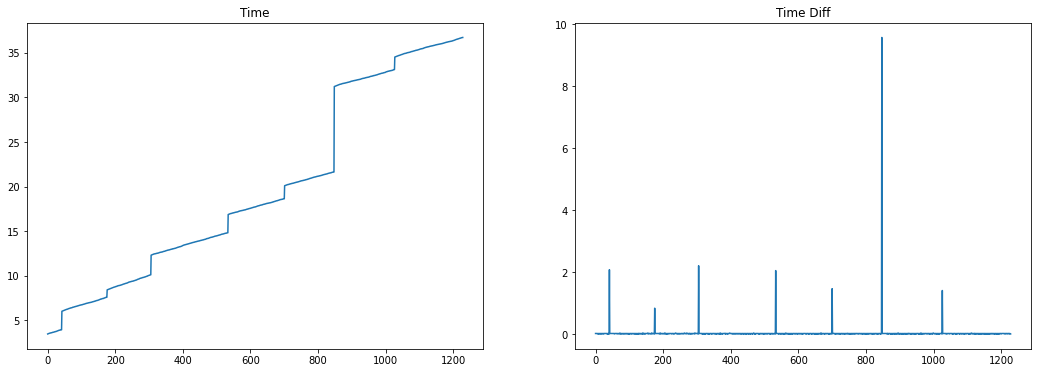

In [13]:
add_column_diff('Time')

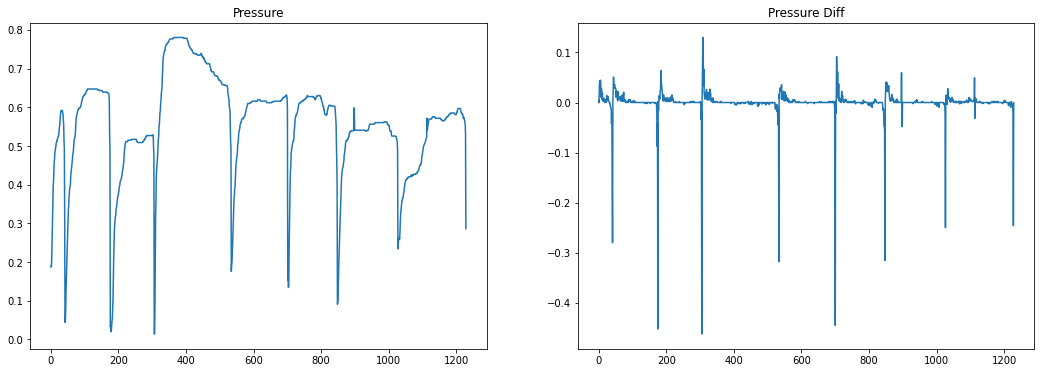

In [14]:
add_column_diff('Pressure')

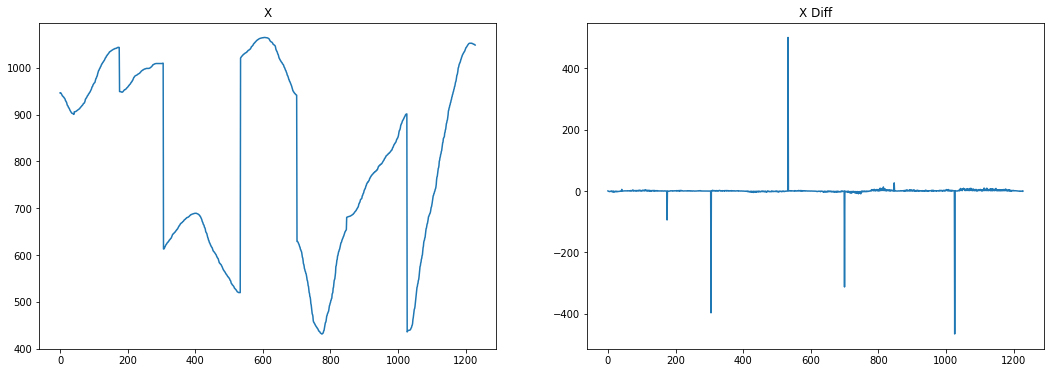

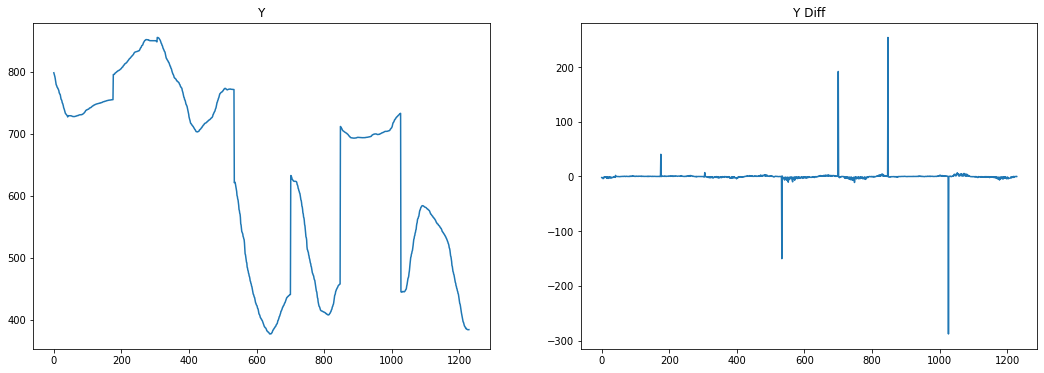

In [15]:
add_column_diff('X')
add_column_diff('Y')

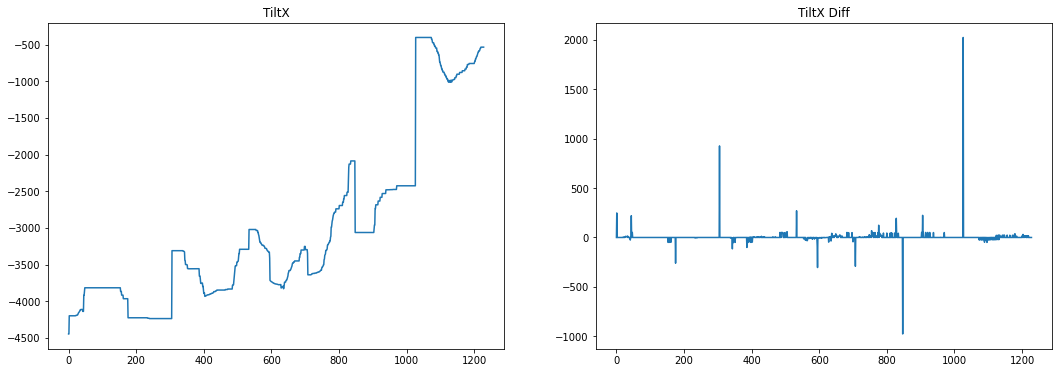

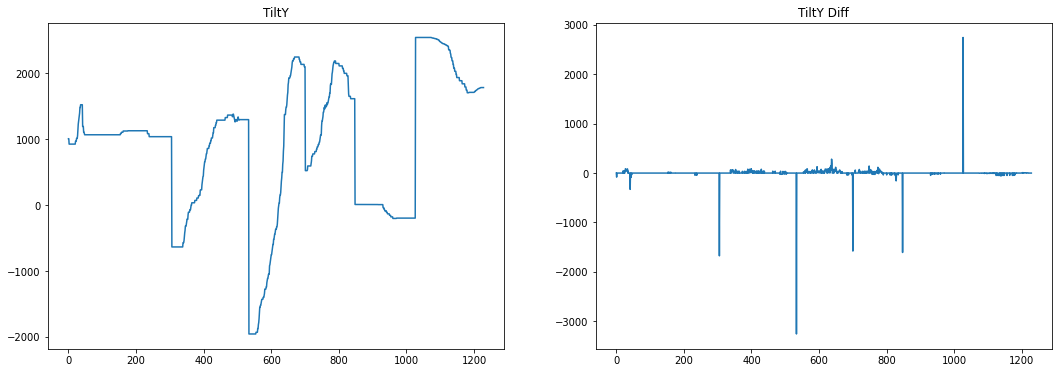

In [16]:
add_column_diff('TiltX')
add_column_diff('TiltY')